In [1]:
#Import Packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn import tree
import numpy as np
import json
from typing import List, Dict, Tuple
import pandas as pd
from sklearn.tree import _tree

In [2]:
#import sys
#from pathlib import Path
#
## Add the parent directory (project/) to the Python path
#sys.path.append(str(Path().resolve().parent))
#

In [3]:
from conformance_checking import (
    xes_to_csv,
    create_alignment,
    load_pnml,
    view_event_log_petrinet,
    DecisionTreeModel,
    DecisionTreeEvaluator,
    RuleRanker,
    extract_rules_from_tree,
    split_log_by_rules_with_labels,
    extract_and_print_rules,
)


In [ ]:
# Load the data from the CSV file
df = pd.read_csv('/home/borna/ProcessMining/Assignments/Process_Mining/conformance_checking/data/df_for_decision_tree.csv')
# Display the first few rows of the dataframe
df.head()

,trace_number,start_log_moves,start_model_moves,A-Create-Application_log_moves,A-Create-Application_model_moves,A-Submitted_log_moves,A-Submitted_model_moves,W-Handle-leads-schedule_log_moves,W-Handle-leads-schedule_model_moves,W-Handle-leads-withdraw_log_moves,...,W-Handle-leads-ate-abort_model_moves,W-Shortened-completion-schedule_log_moves,W-Shortened-completion-schedule_model_moves,W-Shortened-completion-start_log_moves,W-Shortened-completion-start_model_moves,W-Shortened-completion-suspend_log_moves,W-Shortened-completion-suspend_model_moves,W-Call-after-offers-withdraw_log_moves,W-Call-after-offers-withdraw_model_moves,case:throughput_time
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 days 15:06:16.631000
1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 days 04:47:52.288000
2,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 days 02:13:02.807000
3,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21 days 20:18:42.905000
4,4,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 days 02:25:54.292000


In [5]:
# Usage
model = DecisionTreeModel(json_file_path='param_grid.json', random_state=42, test_size=0.2)
model.train_model(df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s

[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV] END max_depth=3, max_features=5

Model Performance:
Best Parameters: {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 40, 'min_samples_split': 60}
Mean Absolute Error (MAE): 162.29 hours
Root Mean Squared Error (RMSE): 231.09 hours
R-squared (R2): 0.19
  Actual Throughput Time (Hours) Predicted Throughput Time (Hours)
0        20 days 00:56:41.258000        14 days 07:37:23.550221982
1     41 days 08:53:06.929999998        15 days 17:28:42.772753164
2      8 days 11:57:34.908999998        14 days 20:51:10.593613638
3     21 days 18:28:18.203999998        19 days 17:52:33.926940678
4      0 days 00:57:59.281999999         6 days 10:27:21.283877192
Decision tree figure saved as decision_tree.png


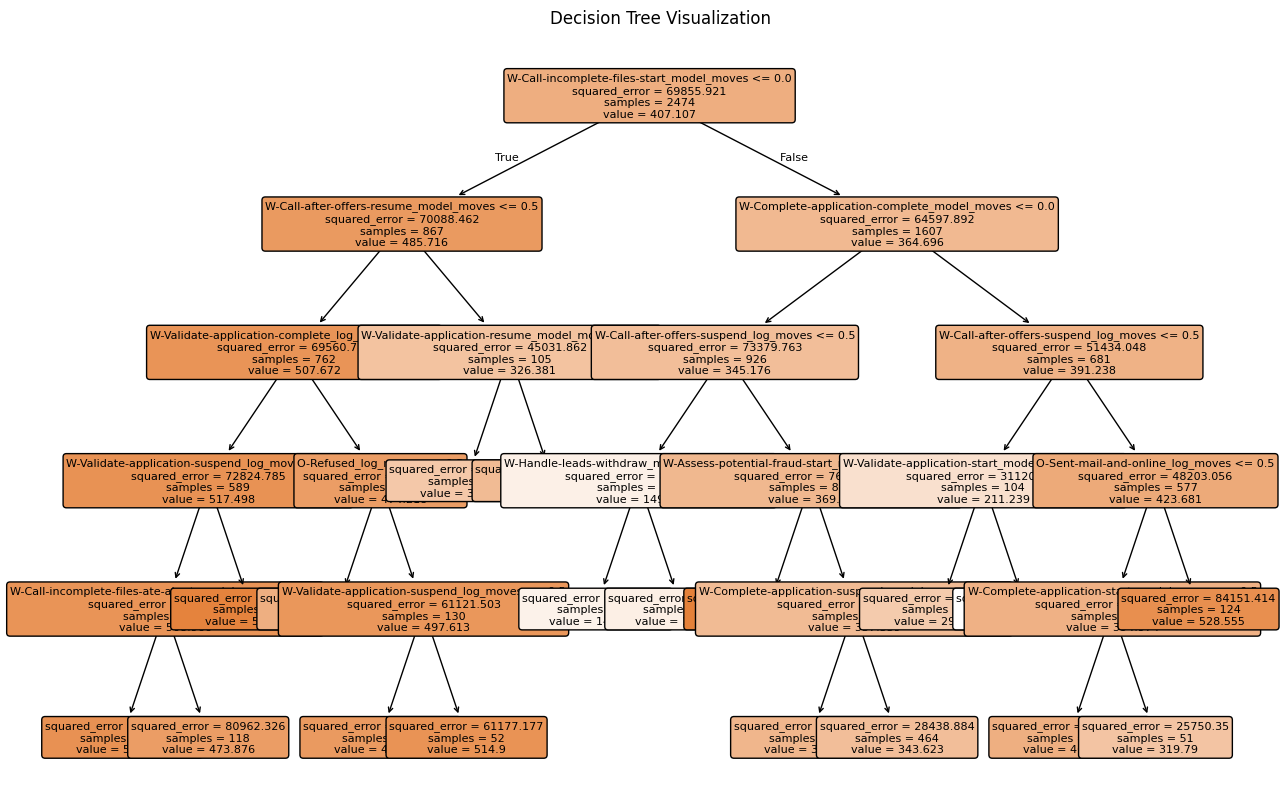

In [ ]:
# Usage
X, y = model.preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=model.test_size, random_state=model.random_state)
evaluator = DecisionTreeEvaluator()
evaluation_results = evaluator.evaluate_model(model.grid_search, X_test, y_test, save_fig=True, fig_path='decision_tree.png')

In [7]:
# Usage
feature_names = df.columns.drop(["trace_number", "None_log_moves", "None_model_moves", "case:throughput_time"])
rules = extract_and_print_rules(model, feature_names)


Extracted Rules:
Rule 1:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= 4.999999873689376e-06
  - W-Call-after-offers-resume_model_moves <= 0.5
  - W-Validate-application-complete_log_moves <= 4.999999873689376e-06
  - W-Validate-application-suspend_log_moves <= 3.5
  - W-Call-incomplete-files-ate-abort_model_moves <= 0.5
  Average Gini Impurity Along Path: 70675.0459
  Final Gini Impurity at Leaf: 67596.0025
  Average Throughput Time (Hours): 519.47

Rule 2:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= 4.999999873689376e-06
  - W-Call-after-offers-resume_model_moves <= 0.5
  - W-Validate-application-complete_log_moves <= 4.999999873689376e-06
  - W-Validate-application-suspend_log_moves <= 3.5
  - W-Call-incomplete-files-ate-abort_model_moves > 0.5
  Average Gini Impurity Along Path: 70675.0459
  Final Gini Impurity at Leaf: 80962.3258
  Average Throughput Time (Hours): 473.88

Rule 3:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= 4.9999998

In [8]:
# Segment the log based on the extracted rules
segmented_logs = split_log_by_rules_with_labels(model.preprocess_data(df)[0], rules)

Segment 1 created with 478 traces (matches Rule 1).
Segment 2 created with 139 traces (matches Rule 2).
Segment 3 created with 102 traces (matches Rule 3).
Segment 4 created with 51 traces (matches Rule 4).
Segment 5 created with 92 traces (matches Rule 5).
Segment 6 created with 60 traces (matches Rule 6).
Segment 7 created with 79 traces (matches Rule 7).
Segment 8 created with 50 traces (matches Rule 8).
Segment 9 created with 61 traces (matches Rule 9).
Segment 10 created with 72 traces (matches Rule 10).
Segment 11 created with 54 traces (matches Rule 11).
Segment 12 created with 395 traces (matches Rule 12).
Segment 13 created with 574 traces (matches Rule 13).
Segment 14 created with 76 traces (matches Rule 14).
Segment 15 created with 53 traces (matches Rule 15).
Segment 16 created with 529 traces (matches Rule 16).
Segment 17 created with 70 traces (matches Rule 17).
Segment 18 created with 158 traces (matches Rule 18).


In [9]:
# Save the ranked rules to a text file
rule_ranker = RuleRanker(rules)
ranked_rules = rule_ranker.rank_rules(by='throughput_time') 
rule_ranker.save_ranked_rules(file_path='ranked_rules_tt.txt', by='throughput_time')

# Change to 'gini' to rank by Gini coefficient
# Usage
rule_ranker = RuleRanker(rules)
ranked_rules = rule_ranker.rank_rules(by='gini') 
rule_ranker.save_ranked_rules(file_path='ranked_rules_gini.txt', by='gini')  # Change to 'gini' to rank by Gini coefficient

Ranked rules saved to ranked_rules_tt.txt
Ranked rules saved to ranked_rules_gini.txt


In [10]:
# Rank rules by Gini coefficient
ranked_rules_by_gini = rule_ranker.rank_rules(by='gini')

# Rank rules by throughput time
ranked_rules_by_throughput_time = rule_ranker.rank_rules(by='throughput_time')

# Print comparison of ranked rules
print("Comparison of Ranked Rules by Gini Coefficient and Throughput Time:")
for idx, (rule_gini, rule_throughput) in enumerate(zip(ranked_rules_by_gini, ranked_rules_by_throughput_time), 1):
    print(f"Rank {idx}:")
    print("By Gini Coefficient:")
    print("Conditions:")
    for feature, operator, threshold in rule_gini['conditions']:
        print(f"  - {feature} {operator} {threshold}")
    print(f"  Average Gini Impurity Along Path: {rule_gini['average_gini']:.4f}")
    print(f"  Final Gini Impurity at Leaf: {rule_gini['final_gini']:.4f}")
    print(f"  Average Throughput Time (Hours): {rule_gini['average_throughput_time']:.2f}\n")

    print("By Throughput Time:")
    print("Conditions:")
    for feature, operator, threshold in rule_throughput['conditions']:
        print(f"  - {feature} {operator} {threshold}")
    print(f"  Average Gini Impurity Along Path: {rule_throughput['average_gini']:.4f}")
    print(f"  Final Gini Impurity at Leaf: {rule_throughput['final_gini']:.4f}")
    print(f"  Average Throughput Time (Hours): {rule_throughput['average_throughput_time']:.2f}\n")

Comparison of Ranked Rules by Gini Coefficient and Throughput Time:
Rank 1:
By Gini Coefficient:
Conditions:
  - W-Call-incomplete-files-start_model_moves > 4.999999873689376e-06
  - W-Complete-application-complete_model_moves <= 4.999999873689376e-06
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Handle-leads-withdraw_model_moves <= 4.999999873689376e-06
  Average Gini Impurity Along Path: 54039.0699
  Final Gini Impurity at Leaf: 7553.4126
  Average Throughput Time (Hours): 142.84

By Throughput Time:
Conditions:
  - W-Call-incomplete-files-start_model_moves > 4.999999873689376e-06
  - W-Complete-application-complete_model_moves > 4.999999873689376e-06
  - W-Call-after-offers-suspend_log_moves <= 0.5000049999998737
  - W-Validate-application-start_model_moves > 4.999999873689376e-06
  Average Gini Impurity Along Path: 54252.0426
  Final Gini Impurity at Leaf: 8272.6595
  Average Throughput Time (Hours): 89.99

Rank 2:
By Gini Coefficient:
Conditions:
  - W-Call-incomplete-fil